<a href="https://colab.research.google.com/github/Bikomwangi/Bikodatascience/blob/master/BIKO_MWANGI_Moringa_Data_Science_CORE_W4_Independent_Project_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **READING THE DATA**

In [57]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#This will read the link 'http://bit.ly/DSCoreAutolibDataset' as a csv file and later load it into a dataframe
url = 'http://bit.ly/DSCoreAutolibDataset'
autolib = pd.read_csv(url, delimiter=',')
autolib_df = pd.DataFrame(autolib)


# **CHECKING THE DATASET**

In [59]:
# determining the number of records in the dataset
autolib_df.shape

(16085, 13)

In [60]:
# previewing the top of the dataset
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [61]:
# previewing the bottom
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [62]:
# checking whether each column has appropriate data types
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# **TIDYING THE DATASET**

In [63]:
# dropping columns that will not applicable in this analysis
to_drop = ['n_daily_data_points', 'dayOfWeek', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
autolib_df.drop(to_drop, axis=1, inplace=True)
autolib_df.head()

,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,weekday,110,103
1,75001,1/2/2018,weekday,98,94
2,75001,1/3/2018,weekday,138,139
3,75001,1/4/2018,weekday,104,104
4,75001,1/5/2018,weekday,114,117


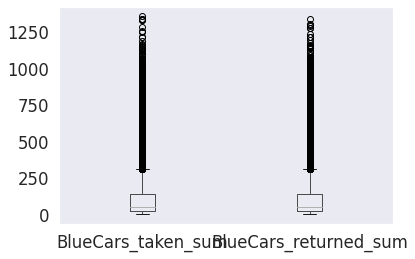

In [64]:
# detecting outliers
autolib_df.boxplot(column =['BlueCars_taken_sum', 'BlueCars_returned_sum'], grid = False) 

plt.show()


Since the two columns above contain a significant number of outliers, I will conclude that the outliers are not erroneuos but they may have occured due to random variation.

In [65]:
# checking the number of unique variables in each column
autolib_df.nunique()

Postal code              104
date                     156
day_type                   2
BlueCars_taken_sum       932
BlueCars_returned_sum    929
dtype: int64

In [66]:
# Identifying the Missing Data
#
missing_values_count = autolib_df.isnull().sum()
missing_values_count

Postal code              0
date                     0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
dtype: int64

In [67]:
#checking for any null values that might be present
autolib_df.isnull().any()

Postal code              False
date                     False
day_type                 False
BlueCars_taken_sum       False
BlueCars_returned_sum    False
dtype: bool

# **EXPLORATORY DATA ANALYSIS**


In [68]:
a= autolib_df[['BlueCars_taken_sum', 'day_type']].groupby(['day_type']).describe()
round(a,1)

BlueCars_taken_sum                                              
                      count   mean    std  min   25%   50%    75%     max
day_type                                                                 
weekday             11544.0  116.0  169.6  0.0  18.0  42.0  126.0  1093.0
weekend              4541.0  151.1  218.6  0.0  25.0  59.0  156.0  1352.0

In [69]:
!pip install -q researchpy
import researchpy as rp
from scipy import stats
rp.summary_cont(autolib_df.groupby("day_type")['BlueCars_taken_sum'])


,N,Mean,SD,SE,95% Conf.,Interval
day_type,,,,,,
weekday,11544,116.0287,169.6269,1.5788,112.9340,119.1233
weekend,4541,151.0901,218.5656,3.2434,144.7313,157.4488


In [70]:
rp.summary_cat(autolib_df[['Postal code']])

,Variable,Outcome,Count,Percent
0,Postal code,94130,156,0.97
1,,93130,156,0.97
2,,92370,156,0.97
3,,92330,156,0.97
4,,92290,156,0.97
...,...,...,...,...
99,,93150,151,0.94
100,,93370,149,0.93
101,,92340,147,0.91
102,,93200,126,0.78


**Box and Whisker's Plot**

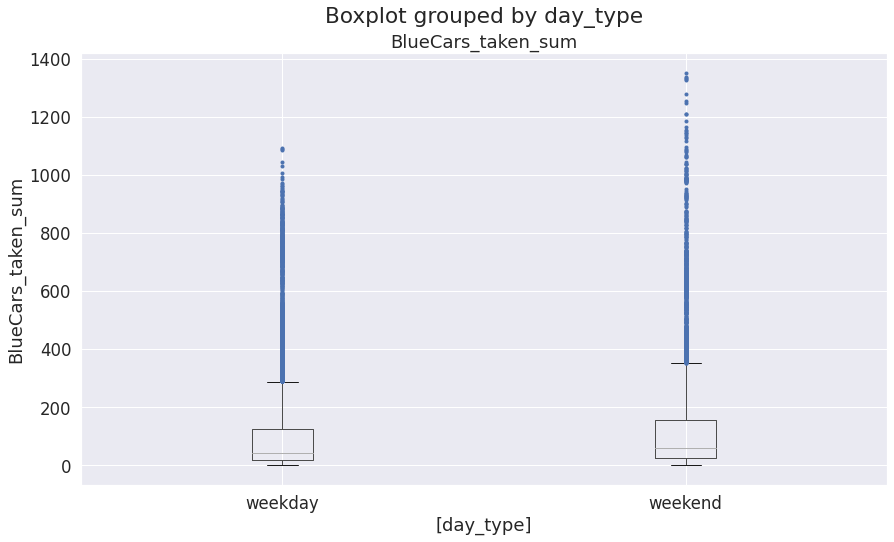

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('BlueCars_taken_sum')

# boxplot with only these two variables
_ = autolib_df[['day_type', 'BlueCars_taken_sum']].boxplot(by='day_type', figsize=(13,8), vert=True, sym='b.', ax=ax)


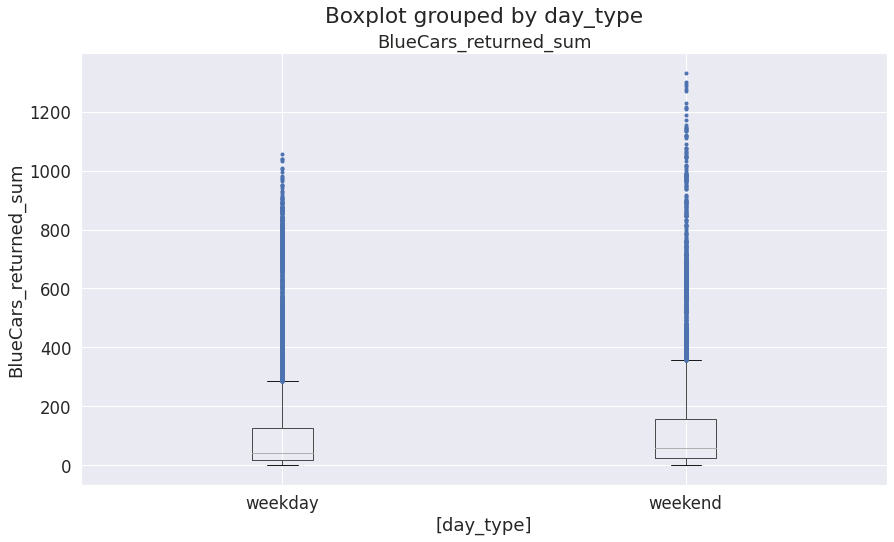

In [72]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('BlueCars_returned_sum')

# boxplot with only these two variables
_ = autolib_df[['day_type', 'BlueCars_returned_sum']].boxplot(by='day_type', figsize=(13,8), vert=True, sym='b.', ax=ax)

# Sampling and hypothesis testing

In [26]:
# finding the sample size
import math
 
# SUPPORTED CONFIDENCE LEVELS: 50%, 68%, 90%, 95%, and 99%
confidence_level_constant = [50,.67], [68,.99], [90,1.64], [95,1.96], [99,2.57]
 
# CALCULATE THE SAMPLE SIZE
def sample_size(population_size, confidence_level, confidence_interval):
  Z = 0.0
  p = 0.5
  e = confidence_interval/100.0
  N = population_size
  n_0 = 0.0
  n = 0.0
 
  # LOOP THROUGH SUPPORTED CONFIDENCE LEVELS AND FIND THE NUM STD
  # DEVIATIONS FOR THAT CONFIDENCE LEVEL
  for i in confidence_level_constant:
    if i[0] == confidence_level:
      Z = i[1]
 
  if Z == 0.0:
    return -1
 
  # CALC SAMPLE SIZE
  n_0 = ((Z**2) * p * (1-p)) / (e**2)
 
  # ADJUST SAMPLE SIZE FOR FINITE POPULATION
  n = n_0 / (1 + ((n_0 - 1) / float(N)) )
 
  return int(math.ceil(n)) # THE SAMPLE SIZE
 
def main():
  sample_sz = 0
  population_sz = 16085
  confidence_level = 95.0
  confidence_interval = 2.0
 
  sample_sz = sample_size(population_sz, confidence_level, confidence_interval)
 
  print("SAMPLE SIZE: %d" % sample_sz)
 
if __name__ == "__main__":
  main()

SAMPLE SIZE: 2090


In [73]:
# obtaining the random sample via simple random sampling
autolib_dfsample = autolib_df.sample(n=2090, replace='False')
autolib_dfsample

,Postal code,date,day_type,BlueCars_taken_sum,BlueCars_returned_sum
12893,93800,3/27/2018,weekday,8,11
923,75006,6/7/2018,weekday,266,261
851,75006,3/16/2018,weekday,277,293
2676,75018,1/25/2018,weekday,387,368
1183,75008,4/5/2018,weekday,497,494
...,...,...,...,...,...
6666,92240,5/1/2018,weekday,98,109
9659,92700,1/5/2018,weekday,114,114
9747,92700,4/6/2018,weekday,125,111
717,75005,4/7/2018,weekend,412,426


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f700f1f2da0>]],
      dtype=object)

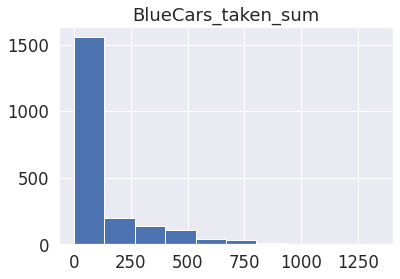

In [74]:
# testing for normality of the autolib_dfsample
autolib_dfsample.hist(column='BlueCars_taken_sum')



The sample does not follow a normal distribution

In [75]:
autolib_dfsample[['BlueCars_taken_sum', 'day_type']].groupby(['day_type']).describe()

BlueCars_taken_sum                          ...                     
                      count        mean         std  ...   50%    75%     max
day_type                                             ...                     
weekday              1521.0  116.778435  168.136791  ...  43.0  130.0   994.0
weekend               569.0  149.992970  210.809531  ...  61.0  149.0  1338.0

[2 rows x 8 columns]

In [76]:
# hypothesis testing
# H0: sample mean of the sum of bluecars taken during the weekends is the same as the population mean of bluecars taken during weekends
# Ha: sample mean of the sum of bluecars taken during weekends is not the same as the population mean of the blue cars taken during weekends 
# population mean and std for the population are as follows   
#          N	    Mean	     SD	      
#day_type						
#weekday	11544	116.0287	169.6269	
#weekend	4541	151.0901	218.5656	
mu = 151.0901
sigma = 218.5656
# sigma is the std of the population


The statistical significance alpha level is α = 0.05. Next, we use a z table to look up the critical z value that cooresponds to this α level. Here we will carry out a two-tailed test because the sample mean can be greater than or less than the population mean. We just are testing to see if the two are equal or not (see the alternative hypothesis above). Next we calculate the z-statitic
for the sample mean compared to the population mean dividing by the standard deviation of the sample mean, which is the standard error σ/sqrt(N). If this z-statistic is less than z-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis. Let's do it.

In [77]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
# the mean of the sample is 157.857143
x_bar = 157.857143
N = 553
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

0.7280809907442307


Since z_stat is less than z_critical we accept the null hypothesis and reject the alternative. Statistically, we say the sample mean of the cars taken on weekends is no different than the population mean.

what if the sample size was larger? I will redo the calculation with N=800



In [79]:
N = 1000;
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

0.9790776272340576


With the increased sample size (N=1000), we will still reject the alternative. However, the Z stat is increasing which means that there is a point where the sample size will lead to the acceptance of the alternative hypothesis. 